In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv')
df.sample(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
349,899147,B,11.95,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.01787,...,12.81,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
372,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
533,91930402,M,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,...,23.23,27.15,152.00,1645.0,0.1097,0.2534,0.30920,0.16130,0.3220,0.06386
249,884689,B,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.18040,0.09608,0.2664,0.07809
399,904357,B,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,...,13.45,24.49,86.00,562.0,0.1244,0.1726,0.14490,0.05356,0.2779,0.08121
57,857793,M,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,17.87,30.70,115.70,985.5,0.1368,0.4290,0.35870,0.18340,0.3698,0.10940


In [2]:
x = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
scaler = StandardScaler()

y = encoder.fit_transform(y)
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [4]:
#k-NN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # k=5

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [5]:
y_predict = knn.predict(x_test)

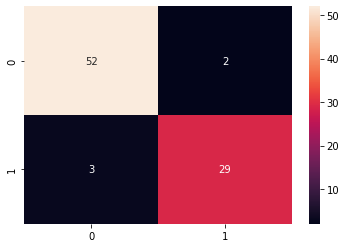

In [6]:
#Baholash

#Confusion matrix

from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True) #annot=True ichidagi raqamlarni chiqarish uchun
plt.show()

## Eng yaxshi k ni topamiz

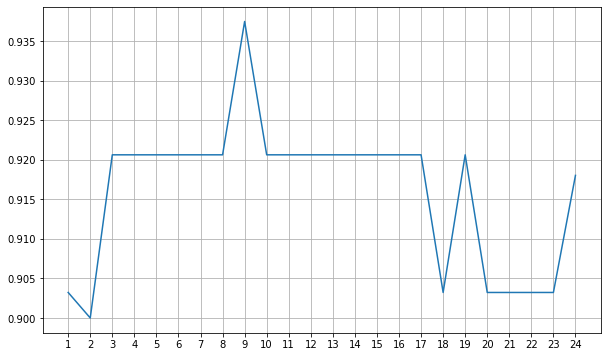

In [7]:
f1 = []
for k in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_predict = knn.predict(x_test)
  f = f1_score(y_test, y_predict)
  f1.append(f)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1)
plt.grid()
plt.xticks(range(1, 25))
plt.show()

**GRID** search yordamida

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [11]:
grid_search.cv_results_

{'mean_fit_time': array([0.00076761, 0.00059166, 0.0005579 , 0.00058608, 0.00059948,
        0.00061336, 0.00060301, 0.00064383, 0.00059075, 0.00059571,
        0.00491791, 0.00068588, 0.00069437, 0.00064993, 0.00086937,
        0.00171866, 0.00060892, 0.0006218 , 0.00070448, 0.0020853 ,
        0.00087137, 0.00066657, 0.0016655 , 0.00068092]),
 'mean_score_time': array([0.00629797, 0.00532227, 0.00539489, 0.00591831, 0.0057817 ,
        0.006006  , 0.0096415 , 0.022856  , 0.01698327, 0.01458755,
        0.00740347, 0.00889783, 0.007621  , 0.01424308, 0.01245432,
        0.00946465, 0.01705661, 0.01904716, 0.01669779, 0.00902753,
        0.00767179, 0.00693169, 0.00901794, 0.01813922]),
 'mean_test_score': array([0.95076851, 0.95432386, 0.95777053, 0.96306474, 0.96485018,
        0.96835895, 0.96835895, 0.96488123, 0.96839   , 0.96488123,
        0.96311132, 0.96311132, 0.96488123, 0.96135693, 0.96135693,
        0.95783263, 0.95783263, 0.95432386, 0.95432386, 0.95432386,
        0.952

In [13]:
grid_search.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [14]:
grid_search.best_params_

{'n_neighbors': 9}

Natija oldingi natija bilan bir xil chiqdi

In [15]:
grid_search.best_score_

0.968390001552554

**Xatolikni grafikda ifodalanishi**

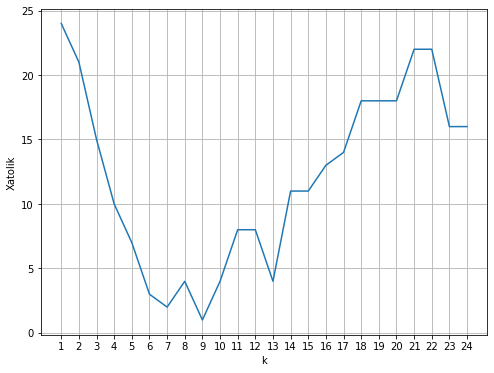

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['rank_test_score'])
plt.ylabel('Xatolik')
plt.xlabel('k')
plt.xticks(param_grid['n_neighbors'])
plt.grid()
plt.show()

Eng kichik xatolik **k=9** da ekan